##### Copyright 2018 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [2]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

# Basic classification: Classify images of clothing

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/keras/classification"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

This guide trains a neural network model to classify images of clothing, like sneakers and shirts. It's okay if you don't understand all the details; this is a fast-paced overview of a complete TensorFlow program with the details explained as you go.

This guide uses [tf.keras](https://www.tensorflow.org/guide/keras), a high-level API to build and train models in TensorFlow.

In [3]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.0


## Import the Fashion MNIST dataset

This guide uses the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Fashion MNIST is intended as a drop-in replacement for the classic [MNIST](http://yann.lecun.com/exdb/mnist/) dataset—often used as the "Hello, World" of machine learning programs for computer vision. The MNIST dataset contains images of handwritten digits (0, 1, 2, etc.) in a format identical to that of the articles of clothing you'll use here.

This guide uses Fashion MNIST for variety, and because it's a slightly more challenging problem than regular MNIST. Both datasets are relatively small and are used to verify that an algorithm works as expected. They're good starting points to test and debug code.

Here, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST directly from TensorFlow. Import and load the Fashion MNIST data directly from TensorFlow:

In [4]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `test_images`, and `test_labels` arrays.

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Each image is mapped to a single label. Since the *class names* are not included with the dataset, store them here to use later when plotting the images:

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore the data

Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [6]:
train_images.shape

(60000, 28, 28)

Likewise, there are 60,000 labels in the training set:

In [7]:
len(train_labels)

60000

Each label is an integer between 0 and 9:

In [8]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels:

In [9]:
test_images.shape

(10000, 28, 28)

And the test set contains 10,000 images labels:

In [10]:
len(test_labels)

10000

## Preprocess the data

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

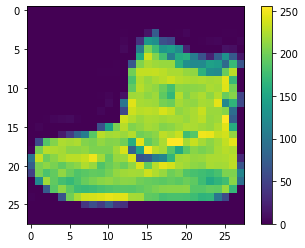

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the *training set* and the *testing set* be preprocessed in the same way:

In [12]:
train_images = train_images / 255.0

test_images = test_images / 255.0

To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the *training set* and display the class name below each image.

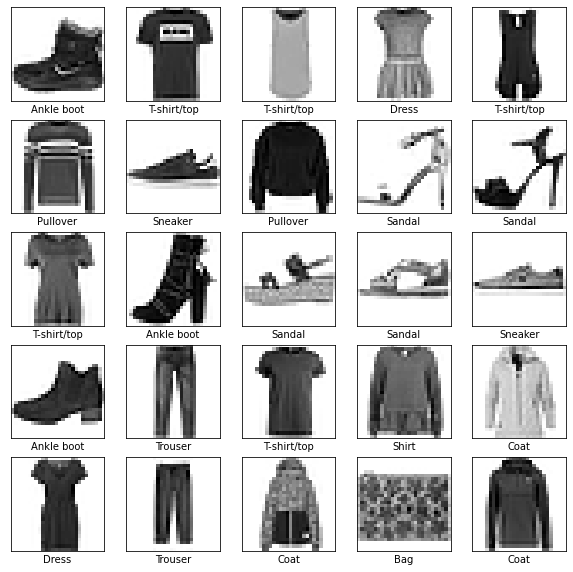

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Build the model

Building the neural network requires configuring the layers of the model, then compiling the model.

### Set up the layers

The basic building block of a neural network is the *layer*. Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as `tf.keras.layers.Dense`, have parameters that are learned during training.

In [14]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

The first layer in this network, `tf.keras.layers.Flatten`, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two `tf.keras.layers.Dense` layers. These are densely connected, or fully connected, neural layers. The first `Dense` layer has 128 nodes (or neurons). The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.

### Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's *compile* step:

* *Loss function* —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
* *Optimizer* —This is how the model is updated based on the data it sees and its loss function.
* *Metrics* —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set—in this example, the `test_images` array.
4. Verify that the predictions match the labels from the `test_labels` array.


### Feed the model

To start training,  call the `model.fit` method—so called because it "fits" the model to the training data:

In [16]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10


   1/1875 [..............................] - ETA: 0s - loss: 2.4586 - accuracy: 0.0625

  35/1875 [..............................] - ETA: 2s - loss: 1.3052 - accuracy: 0.5616

  71/1875 [>.............................] - ETA: 2s - loss: 1.0356 - accuracy: 0.6474

 108/1875 [>.............................] - ETA: 2s - loss: 0.9177 - accuracy: 0.6858

 145/1875 [=>............................] - ETA: 2s - loss: 0.8484 - accuracy: 0.7103

 182/1875 [=>............................] - ETA: 2s - loss: 0.7961 - accuracy: 0.7280

 218/1875 [==>...........................] - ETA: 2s - loss: 0.7678 - accuracy: 0.7362

 254/1875 [===>..........................] - ETA: 2s - loss: 0.7385 - accuracy: 0.7464

 292/1875 [===>..........................] - ETA: 2s - loss: 0.7162 - accuracy: 0.7543

 329/1875 [====>.........................] - ETA: 2s - loss: 0.7026 - accuracy: 0.7588

 366/1875 [====>.........................] - ETA: 2s - loss: 0.6857 - accuracy: 0.7660

 403/1875 [=====>........................] - ETA: 2s - loss: 0.6711 - accuracy: 0.7704

 439/1875 [======>.......................] - ETA: 1s - loss: 0.6578 - accuracy: 0.7751

 476/1875 [======>.......................] - ETA: 1s - loss: 0.6436 - accuracy: 0.7787

 511/1875 [=======>......................] - ETA: 1s - loss: 0.6355 - accuracy: 0.7821

 546/1875 [=======>......................] - ETA: 1s - loss: 0.6250 - accuracy: 0.7861

 581/1875 [========>.....................] - ETA: 1s - loss: 0.6158 - accuracy: 0.7885

 617/1875 [========>.....................] - ETA: 1s - loss: 0.6080 - accuracy: 0.7905

 652/1875 [=========>....................] - ETA: 1s - loss: 0.6017 - accuracy: 0.7925

 687/1875 [=========>....................] - ETA: 1s - loss: 0.5994 - accuracy: 0.7934

 724/1875 [==========>...................] - ETA: 1s - loss: 0.5946 - accuracy: 0.7951

 760/1875 [===========>..................] - ETA: 1s - loss: 0.5895 - accuracy: 0.7964

 795/1875 [===========>..................] - ETA: 1s - loss: 0.5856 - accuracy: 0.7985

 830/1875 [============>.................] - ETA: 1s - loss: 0.5801 - accuracy: 0.8006

 866/1875 [============>.................] - ETA: 1s - loss: 0.5748 - accuracy: 0.8023

 903/1875 [=============>................] - ETA: 1s - loss: 0.5685 - accuracy: 0.8042

 939/1875 [==============>...............] - ETA: 1s - loss: 0.5656 - accuracy: 0.8051

 975/1875 [==============>...............] - ETA: 1s - loss: 0.5624 - accuracy: 0.8058

1011/1875 [===============>..............] - ETA: 1s - loss: 0.5586 - accuracy: 0.8067

1048/1875 [===============>..............] - ETA: 1s - loss: 0.5534 - accuracy: 0.8082

1084/1875 [================>.............] - ETA: 1s - loss: 0.5500 - accuracy: 0.8094

1119/1875 [================>.............] - ETA: 1s - loss: 0.5453 - accuracy: 0.8110

1156/1875 [=================>............] - ETA: 1s - loss: 0.5429 - accuracy: 0.8117

1192/1875 [==================>...........] - ETA: 0s - loss: 0.5399 - accuracy: 0.8126

1227/1875 [==================>...........] - ETA: 0s - loss: 0.5381 - accuracy: 0.8135

1263/1875 [===================>..........] - ETA: 0s - loss: 0.5340 - accuracy: 0.8148

1299/1875 [===================>..........] - ETA: 0s - loss: 0.5293 - accuracy: 0.8162

1334/1875 [====================>.........] - ETA: 0s - loss: 0.5272 - accuracy: 0.8170

1370/1875 [====================>.........] - ETA: 0s - loss: 0.5248 - accuracy: 0.8176

1406/1875 [=====================>........] - ETA: 0s - loss: 0.5228 - accuracy: 0.8179

1442/1875 [======================>.......] - ETA: 0s - loss: 0.5210 - accuracy: 0.8183

1477/1875 [======================>.......] - ETA: 0s - loss: 0.5185 - accuracy: 0.8190

1511/1875 [=======================>......] - ETA: 0s - loss: 0.5164 - accuracy: 0.8201

1546/1875 [=======================>......] - ETA: 0s - loss: 0.5145 - accuracy: 0.8205

1582/1875 [========================>.....] - ETA: 0s - loss: 0.5122 - accuracy: 0.8212

1619/1875 [========================>.....] - ETA: 0s - loss: 0.5102 - accuracy: 0.8215

1655/1875 [=========================>....] - ETA: 0s - loss: 0.5079 - accuracy: 0.8223

1690/1875 [==========================>...] - ETA: 0s - loss: 0.5062 - accuracy: 0.8227

1727/1875 [==========================>...] - ETA: 0s - loss: 0.5043 - accuracy: 0.8233

1764/1875 [===========================>..] - ETA: 0s - loss: 0.5023 - accuracy: 0.8237

1801/1875 [===========================>..] - ETA: 0s - loss: 0.4993 - accuracy: 0.8248

1836/1875 [============================>.] - ETA: 0s - loss: 0.4981 - accuracy: 0.8252

1873/1875 [============================>.] - ETA: 0s - loss: 0.4969 - accuracy: 0.8257

1875/1875 [==============================] - 3s 1ms/step - loss: 0.4967 - accuracy: 0.8257


Epoch 2/10
   1/1875 [..............................] - ETA: 0s - loss: 0.3901 - accuracy: 0.7812

  37/1875 [..............................] - ETA: 2s - loss: 0.4000 - accuracy: 0.8539

  73/1875 [>.............................] - ETA: 2s - loss: 0.3848 - accuracy: 0.8634

 109/1875 [>.............................] - ETA: 2s - loss: 0.3773 - accuracy: 0.8670

 145/1875 [=>............................] - ETA: 2s - loss: 0.3838 - accuracy: 0.8640

 180/1875 [=>............................] - ETA: 2s - loss: 0.3848 - accuracy: 0.8644

 216/1875 [==>...........................] - ETA: 2s - loss: 0.3872 - accuracy: 0.8637

 252/1875 [===>..........................] - ETA: 2s - loss: 0.3909 - accuracy: 0.8615

 288/1875 [===>..........................] - ETA: 2s - loss: 0.3863 - accuracy: 0.8631

 323/1875 [====>.........................] - ETA: 2s - loss: 0.3829 - accuracy: 0.8640

 359/1875 [====>.........................] - ETA: 2s - loss: 0.3828 - accuracy: 0.8629

 395/1875 [=====>........................] - ETA: 2s - loss: 0.3846 - accuracy: 0.8613

 431/1875 [=====>........................] - ETA: 2s - loss: 0.3875 - accuracy: 0.8603

 467/1875 [======>.......................] - ETA: 1s - loss: 0.3885 - accuracy: 0.8598

 503/1875 [=======>......................] - ETA: 1s - loss: 0.3898 - accuracy: 0.8594

 539/1875 [=======>......................] - ETA: 1s - loss: 0.3910 - accuracy: 0.8580

 576/1875 [========>.....................] - ETA: 1s - loss: 0.3919 - accuracy: 0.8579

 613/1875 [========>.....................] - ETA: 1s - loss: 0.3922 - accuracy: 0.8577

 649/1875 [=========>....................] - ETA: 1s - loss: 0.3921 - accuracy: 0.8582

 686/1875 [=========>....................] - ETA: 1s - loss: 0.3904 - accuracy: 0.8589

 723/1875 [==========>...................] - ETA: 1s - loss: 0.3909 - accuracy: 0.8584

 757/1875 [===========>..................] - ETA: 1s - loss: 0.3892 - accuracy: 0.8589

 792/1875 [===========>..................] - ETA: 1s - loss: 0.3882 - accuracy: 0.8591

 827/1875 [============>.................] - ETA: 1s - loss: 0.3883 - accuracy: 0.8588

 862/1875 [============>.................] - ETA: 1s - loss: 0.3890 - accuracy: 0.8589

 897/1875 [=============>................] - ETA: 1s - loss: 0.3891 - accuracy: 0.8586

 933/1875 [=============>................] - ETA: 1s - loss: 0.3876 - accuracy: 0.8594

 969/1875 [==============>...............] - ETA: 1s - loss: 0.3864 - accuracy: 0.8601

1005/1875 [===============>..............] - ETA: 1s - loss: 0.3845 - accuracy: 0.8609

1041/1875 [===============>..............] - ETA: 1s - loss: 0.3837 - accuracy: 0.8610

1077/1875 [================>.............] - ETA: 1s - loss: 0.3840 - accuracy: 0.8608

1113/1875 [================>.............] - ETA: 1s - loss: 0.3828 - accuracy: 0.8612

1149/1875 [=================>............] - ETA: 1s - loss: 0.3811 - accuracy: 0.8620

1185/1875 [=================>............] - ETA: 0s - loss: 0.3798 - accuracy: 0.8624

1222/1875 [==================>...........] - ETA: 0s - loss: 0.3804 - accuracy: 0.8624

1257/1875 [===================>..........] - ETA: 0s - loss: 0.3795 - accuracy: 0.8631

1291/1875 [===================>..........] - ETA: 0s - loss: 0.3800 - accuracy: 0.8633

1327/1875 [====================>.........] - ETA: 0s - loss: 0.3800 - accuracy: 0.8632

1363/1875 [====================>.........] - ETA: 0s - loss: 0.3792 - accuracy: 0.8634

1400/1875 [=====================>........] - ETA: 0s - loss: 0.3787 - accuracy: 0.8635

1436/1875 [=====================>........] - ETA: 0s - loss: 0.3778 - accuracy: 0.8637

1471/1875 [======================>.......] - ETA: 0s - loss: 0.3770 - accuracy: 0.8637

1507/1875 [=======================>......] - ETA: 0s - loss: 0.3766 - accuracy: 0.8640

1543/1875 [=======================>......] - ETA: 0s - loss: 0.3766 - accuracy: 0.8638

1580/1875 [========================>.....] - ETA: 0s - loss: 0.3767 - accuracy: 0.8636

1617/1875 [========================>.....] - ETA: 0s - loss: 0.3771 - accuracy: 0.8635

1654/1875 [=========================>....] - ETA: 0s - loss: 0.3772 - accuracy: 0.8636

1690/1875 [==========================>...] - ETA: 0s - loss: 0.3781 - accuracy: 0.8634

1726/1875 [==========================>...] - ETA: 0s - loss: 0.3773 - accuracy: 0.8636

1762/1875 [===========================>..] - ETA: 0s - loss: 0.3770 - accuracy: 0.8640

1797/1875 [===========================>..] - ETA: 0s - loss: 0.3767 - accuracy: 0.8640

1833/1875 [============================>.] - ETA: 0s - loss: 0.3774 - accuracy: 0.8637

1870/1875 [============================>.] - ETA: 0s - loss: 0.3766 - accuracy: 0.8640

1875/1875 [==============================] - 3s 1ms/step - loss: 0.3764 - accuracy: 0.8641


Epoch 3/10
   1/1875 [..............................] - ETA: 0s - loss: 0.2660 - accuracy: 0.9062

  38/1875 [..............................] - ETA: 2s - loss: 0.3480 - accuracy: 0.8758

  75/1875 [>.............................] - ETA: 2s - loss: 0.3617 - accuracy: 0.8633

 111/1875 [>.............................] - ETA: 2s - loss: 0.3503 - accuracy: 0.8668

 147/1875 [=>............................] - ETA: 2s - loss: 0.3498 - accuracy: 0.8669

 184/1875 [=>............................] - ETA: 2s - loss: 0.3503 - accuracy: 0.8657

 220/1875 [==>...........................] - ETA: 2s - loss: 0.3560 - accuracy: 0.8629

 257/1875 [===>..........................] - ETA: 2s - loss: 0.3553 - accuracy: 0.8643

 293/1875 [===>..........................] - ETA: 2s - loss: 0.3513 - accuracy: 0.8677

 329/1875 [====>.........................] - ETA: 2s - loss: 0.3503 - accuracy: 0.8703

 365/1875 [====>.........................] - ETA: 2s - loss: 0.3516 - accuracy: 0.8699

 401/1875 [=====>........................] - ETA: 2s - loss: 0.3487 - accuracy: 0.8720

 438/1875 [======>.......................] - ETA: 1s - loss: 0.3474 - accuracy: 0.8729

 475/1875 [======>.......................] - ETA: 1s - loss: 0.3457 - accuracy: 0.8739

 512/1875 [=======>......................] - ETA: 1s - loss: 0.3480 - accuracy: 0.8730

 548/1875 [=======>......................] - ETA: 1s - loss: 0.3477 - accuracy: 0.8733

 583/1875 [========>.....................] - ETA: 1s - loss: 0.3477 - accuracy: 0.8729

 618/1875 [========>.....................] - ETA: 1s - loss: 0.3462 - accuracy: 0.8740

 653/1875 [=========>....................] - ETA: 1s - loss: 0.3451 - accuracy: 0.8748

 688/1875 [==========>...................] - ETA: 1s - loss: 0.3433 - accuracy: 0.8753

 724/1875 [==========>...................] - ETA: 1s - loss: 0.3419 - accuracy: 0.8758

 760/1875 [===========>..................] - ETA: 1s - loss: 0.3431 - accuracy: 0.8755

 797/1875 [===========>..................] - ETA: 1s - loss: 0.3426 - accuracy: 0.8757

 834/1875 [============>.................] - ETA: 1s - loss: 0.3448 - accuracy: 0.8748

 870/1875 [============>.................] - ETA: 1s - loss: 0.3457 - accuracy: 0.8745

 905/1875 [=============>................] - ETA: 1s - loss: 0.3450 - accuracy: 0.8748

 941/1875 [==============>...............] - ETA: 1s - loss: 0.3438 - accuracy: 0.8751

 976/1875 [==============>...............] - ETA: 1s - loss: 0.3435 - accuracy: 0.8749

1012/1875 [===============>..............] - ETA: 1s - loss: 0.3431 - accuracy: 0.8752

1047/1875 [===============>..............] - ETA: 1s - loss: 0.3419 - accuracy: 0.8755

1082/1875 [================>.............] - ETA: 1s - loss: 0.3433 - accuracy: 0.8750

1118/1875 [================>.............] - ETA: 1s - loss: 0.3429 - accuracy: 0.8755

1154/1875 [=================>............] - ETA: 1s - loss: 0.3418 - accuracy: 0.8758

1191/1875 [==================>...........] - ETA: 0s - loss: 0.3417 - accuracy: 0.8759

1228/1875 [==================>...........] - ETA: 0s - loss: 0.3430 - accuracy: 0.8754

1264/1875 [===================>..........] - ETA: 0s - loss: 0.3421 - accuracy: 0.8756

1299/1875 [===================>..........] - ETA: 0s - loss: 0.3422 - accuracy: 0.8754

1335/1875 [====================>.........] - ETA: 0s - loss: 0.3429 - accuracy: 0.8751

1371/1875 [====================>.........] - ETA: 0s - loss: 0.3431 - accuracy: 0.8752

1406/1875 [=====================>........] - ETA: 0s - loss: 0.3430 - accuracy: 0.8754

1443/1875 [======================>.......] - ETA: 0s - loss: 0.3427 - accuracy: 0.8755

1480/1875 [======================>.......] - ETA: 0s - loss: 0.3436 - accuracy: 0.8752

1517/1875 [=======================>......] - ETA: 0s - loss: 0.3435 - accuracy: 0.8751

1554/1875 [=======================>......] - ETA: 0s - loss: 0.3428 - accuracy: 0.8752

1591/1875 [========================>.....] - ETA: 0s - loss: 0.3420 - accuracy: 0.8753

1628/1875 [=========================>....] - ETA: 0s - loss: 0.3415 - accuracy: 0.8755

1665/1875 [=========================>....] - ETA: 0s - loss: 0.3420 - accuracy: 0.8755

1702/1875 [==========================>...] - ETA: 0s - loss: 0.3417 - accuracy: 0.8759

1739/1875 [==========================>...] - ETA: 0s - loss: 0.3421 - accuracy: 0.8758

1773/1875 [===========================>..] - ETA: 0s - loss: 0.3416 - accuracy: 0.8758

1809/1875 [===========================>..] - ETA: 0s - loss: 0.3411 - accuracy: 0.8760

1846/1875 [============================>.] - ETA: 0s - loss: 0.3407 - accuracy: 0.8761

1875/1875 [==============================] - 3s 1ms/step - loss: 0.3400 - accuracy: 0.8762


Epoch 4/10
   1/1875 [..............................] - ETA: 0s - loss: 0.5157 - accuracy: 0.8125

  38/1875 [..............................] - ETA: 2s - loss: 0.3412 - accuracy: 0.8725

  75/1875 [>.............................] - ETA: 2s - loss: 0.3166 - accuracy: 0.8854

 112/1875 [>.............................] - ETA: 2s - loss: 0.3220 - accuracy: 0.8836

 148/1875 [=>............................] - ETA: 2s - loss: 0.3223 - accuracy: 0.8815

 184/1875 [=>............................] - ETA: 2s - loss: 0.3148 - accuracy: 0.8840

 221/1875 [==>...........................] - ETA: 2s - loss: 0.3138 - accuracy: 0.8836

 258/1875 [===>..........................] - ETA: 2s - loss: 0.3174 - accuracy: 0.8823

 295/1875 [===>..........................] - ETA: 2s - loss: 0.3158 - accuracy: 0.8825

 332/1875 [====>.........................] - ETA: 2s - loss: 0.3148 - accuracy: 0.8838

 369/1875 [====>.........................] - ETA: 2s - loss: 0.3150 - accuracy: 0.8834

 406/1875 [=====>........................] - ETA: 2s - loss: 0.3170 - accuracy: 0.8834

 443/1875 [======>.......................] - ETA: 1s - loss: 0.3182 - accuracy: 0.8826

 480/1875 [======>.......................] - ETA: 1s - loss: 0.3170 - accuracy: 0.8825

 516/1875 [=======>......................] - ETA: 1s - loss: 0.3162 - accuracy: 0.8827

 552/1875 [=======>......................] - ETA: 1s - loss: 0.3151 - accuracy: 0.8826

 589/1875 [========>.....................] - ETA: 1s - loss: 0.3165 - accuracy: 0.8822

 625/1875 [=========>....................] - ETA: 1s - loss: 0.3172 - accuracy: 0.8816

 661/1875 [=========>....................] - ETA: 1s - loss: 0.3181 - accuracy: 0.8817

 697/1875 [==========>...................] - ETA: 1s - loss: 0.3181 - accuracy: 0.8815

 733/1875 [==========>...................] - ETA: 1s - loss: 0.3175 - accuracy: 0.8816

 769/1875 [===========>..................] - ETA: 1s - loss: 0.3169 - accuracy: 0.8820

 805/1875 [===========>..................] - ETA: 1s - loss: 0.3155 - accuracy: 0.8825

 841/1875 [============>.................] - ETA: 1s - loss: 0.3169 - accuracy: 0.8820

 877/1875 [=============>................] - ETA: 1s - loss: 0.3181 - accuracy: 0.8819

 913/1875 [=============>................] - ETA: 1s - loss: 0.3180 - accuracy: 0.8822

 949/1875 [==============>...............] - ETA: 1s - loss: 0.3173 - accuracy: 0.8831

 986/1875 [==============>...............] - ETA: 1s - loss: 0.3167 - accuracy: 0.8831

1023/1875 [===============>..............] - ETA: 1s - loss: 0.3163 - accuracy: 0.8831

1060/1875 [===============>..............] - ETA: 1s - loss: 0.3166 - accuracy: 0.8832

1097/1875 [================>.............] - ETA: 1s - loss: 0.3176 - accuracy: 0.8828

1133/1875 [=================>............] - ETA: 1s - loss: 0.3168 - accuracy: 0.8833

1170/1875 [=================>............] - ETA: 0s - loss: 0.3185 - accuracy: 0.8829

1206/1875 [==================>...........] - ETA: 0s - loss: 0.3185 - accuracy: 0.8830

1242/1875 [==================>...........] - ETA: 0s - loss: 0.3192 - accuracy: 0.8829

1278/1875 [===================>..........] - ETA: 0s - loss: 0.3186 - accuracy: 0.8829

1312/1875 [===================>..........] - ETA: 0s - loss: 0.3184 - accuracy: 0.8830

1346/1875 [====================>.........] - ETA: 0s - loss: 0.3187 - accuracy: 0.8827

1381/1875 [=====================>........] - ETA: 0s - loss: 0.3193 - accuracy: 0.8827

1417/1875 [=====================>........] - ETA: 0s - loss: 0.3191 - accuracy: 0.8828

1453/1875 [======================>.......] - ETA: 0s - loss: 0.3186 - accuracy: 0.8830

1489/1875 [======================>.......] - ETA: 0s - loss: 0.3189 - accuracy: 0.8828

1524/1875 [=======================>......] - ETA: 0s - loss: 0.3182 - accuracy: 0.8831

1559/1875 [=======================>......] - ETA: 0s - loss: 0.3180 - accuracy: 0.8832

1594/1875 [========================>.....] - ETA: 0s - loss: 0.3170 - accuracy: 0.8836

1630/1875 [=========================>....] - ETA: 0s - loss: 0.3168 - accuracy: 0.8837

1664/1875 [=========================>....] - ETA: 0s - loss: 0.3164 - accuracy: 0.8837

1699/1875 [==========================>...] - ETA: 0s - loss: 0.3170 - accuracy: 0.8835

1735/1875 [==========================>...] - ETA: 0s - loss: 0.3168 - accuracy: 0.8836

1770/1875 [===========================>..] - ETA: 0s - loss: 0.3164 - accuracy: 0.8837

1806/1875 [===========================>..] - ETA: 0s - loss: 0.3152 - accuracy: 0.8841

1841/1875 [============================>.] - ETA: 0s - loss: 0.3159 - accuracy: 0.8839

1875/1875 [==============================] - 3s 1ms/step - loss: 0.3156 - accuracy: 0.8841


Epoch 5/10
   1/1875 [..............................] - ETA: 0s - loss: 0.2361 - accuracy: 0.9375

  37/1875 [..............................] - ETA: 2s - loss: 0.2840 - accuracy: 0.8986

  73/1875 [>.............................] - ETA: 2s - loss: 0.2839 - accuracy: 0.8977

 110/1875 [>.............................] - ETA: 2s - loss: 0.2745 - accuracy: 0.9011

 146/1875 [=>............................] - ETA: 2s - loss: 0.2759 - accuracy: 0.8981

 183/1875 [=>............................] - ETA: 2s - loss: 0.2786 - accuracy: 0.8972

 220/1875 [==>...........................] - ETA: 2s - loss: 0.2780 - accuracy: 0.8972

 256/1875 [===>..........................] - ETA: 2s - loss: 0.2889 - accuracy: 0.8928

 292/1875 [===>..........................] - ETA: 2s - loss: 0.2889 - accuracy: 0.8934

 327/1875 [====>.........................] - ETA: 2s - loss: 0.2893 - accuracy: 0.8920

 363/1875 [====>.........................] - ETA: 2s - loss: 0.2936 - accuracy: 0.8902

 400/1875 [=====>........................] - ETA: 2s - loss: 0.2942 - accuracy: 0.8896

 436/1875 [=====>........................] - ETA: 2s - loss: 0.2940 - accuracy: 0.8903

 472/1875 [======>.......................] - ETA: 1s - loss: 0.2912 - accuracy: 0.8916

 507/1875 [=======>......................] - ETA: 1s - loss: 0.2931 - accuracy: 0.8913

 544/1875 [=======>......................] - ETA: 1s - loss: 0.2962 - accuracy: 0.8905

 580/1875 [========>.....................] - ETA: 1s - loss: 0.2969 - accuracy: 0.8906

 613/1875 [========>.....................] - ETA: 1s - loss: 0.2980 - accuracy: 0.8900

 645/1875 [=========>....................] - ETA: 1s - loss: 0.2971 - accuracy: 0.8905

 677/1875 [=========>....................] - ETA: 1s - loss: 0.2968 - accuracy: 0.8899

 708/1875 [==========>...................] - ETA: 1s - loss: 0.2956 - accuracy: 0.8902

 740/1875 [==========>...................] - ETA: 1s - loss: 0.2944 - accuracy: 0.8905

 772/1875 [===========>..................] - ETA: 1s - loss: 0.2930 - accuracy: 0.8907

 804/1875 [===========>..................] - ETA: 1s - loss: 0.2930 - accuracy: 0.8909

 838/1875 [============>.................] - ETA: 1s - loss: 0.2929 - accuracy: 0.8913

 875/1875 [=============>................] - ETA: 1s - loss: 0.2937 - accuracy: 0.8913

 912/1875 [=============>................] - ETA: 1s - loss: 0.2934 - accuracy: 0.8915

 948/1875 [==============>...............] - ETA: 1s - loss: 0.2942 - accuracy: 0.8914

 985/1875 [==============>...............] - ETA: 1s - loss: 0.2937 - accuracy: 0.8918

1021/1875 [===============>..............] - ETA: 1s - loss: 0.2950 - accuracy: 0.8915

1058/1875 [===============>..............] - ETA: 1s - loss: 0.2955 - accuracy: 0.8916

1094/1875 [================>.............] - ETA: 1s - loss: 0.2958 - accuracy: 0.8917

1131/1875 [=================>............] - ETA: 1s - loss: 0.2969 - accuracy: 0.8914

1168/1875 [=================>............] - ETA: 1s - loss: 0.2971 - accuracy: 0.8912

1204/1875 [==================>...........] - ETA: 0s - loss: 0.2964 - accuracy: 0.8914

1241/1875 [==================>...........] - ETA: 0s - loss: 0.2958 - accuracy: 0.8914

1278/1875 [===================>..........] - ETA: 0s - loss: 0.2958 - accuracy: 0.8916

1313/1875 [====================>.........] - ETA: 0s - loss: 0.2957 - accuracy: 0.8918

1348/1875 [====================>.........] - ETA: 0s - loss: 0.2963 - accuracy: 0.8916

1383/1875 [=====================>........] - ETA: 0s - loss: 0.2963 - accuracy: 0.8917

1418/1875 [=====================>........] - ETA: 0s - loss: 0.2961 - accuracy: 0.8917

1452/1875 [======================>.......] - ETA: 0s - loss: 0.2966 - accuracy: 0.8915

1487/1875 [======================>.......] - ETA: 0s - loss: 0.2972 - accuracy: 0.8912

1520/1875 [=======================>......] - ETA: 0s - loss: 0.2973 - accuracy: 0.8912

1556/1875 [=======================>......] - ETA: 0s - loss: 0.2965 - accuracy: 0.8916

1591/1875 [========================>.....] - ETA: 0s - loss: 0.2963 - accuracy: 0.8914

1625/1875 [=========================>....] - ETA: 0s - loss: 0.2959 - accuracy: 0.8915

1661/1875 [=========================>....] - ETA: 0s - loss: 0.2953 - accuracy: 0.8917

1696/1875 [==========================>...] - ETA: 0s - loss: 0.2953 - accuracy: 0.8917

1732/1875 [==========================>...] - ETA: 0s - loss: 0.2956 - accuracy: 0.8917

1766/1875 [===========================>..] - ETA: 0s - loss: 0.2965 - accuracy: 0.8913

1800/1875 [===========================>..] - ETA: 0s - loss: 0.2961 - accuracy: 0.8913

1834/1875 [============================>.] - ETA: 0s - loss: 0.2953 - accuracy: 0.8915

1868/1875 [============================>.] - ETA: 0s - loss: 0.2955 - accuracy: 0.8913

1875/1875 [==============================] - 3s 1ms/step - loss: 0.2954 - accuracy: 0.8913


Epoch 6/10
   1/1875 [..............................] - ETA: 0s - loss: 0.3182 - accuracy: 0.9062

  36/1875 [..............................] - ETA: 2s - loss: 0.2821 - accuracy: 0.8924

  71/1875 [>.............................] - ETA: 2s - loss: 0.2686 - accuracy: 0.8988

 106/1875 [>.............................] - ETA: 2s - loss: 0.2774 - accuracy: 0.8968

 141/1875 [=>............................] - ETA: 2s - loss: 0.2784 - accuracy: 0.8961

 176/1875 [=>............................] - ETA: 2s - loss: 0.2842 - accuracy: 0.8936

 211/1875 [==>...........................] - ETA: 2s - loss: 0.2784 - accuracy: 0.8968

 246/1875 [==>...........................] - ETA: 2s - loss: 0.2753 - accuracy: 0.8982

 282/1875 [===>..........................] - ETA: 2s - loss: 0.2725 - accuracy: 0.8988

 317/1875 [====>.........................] - ETA: 2s - loss: 0.2769 - accuracy: 0.8982

 352/1875 [====>.........................] - ETA: 2s - loss: 0.2767 - accuracy: 0.8983

 389/1875 [=====>........................] - ETA: 2s - loss: 0.2767 - accuracy: 0.8987

 425/1875 [=====>........................] - ETA: 2s - loss: 0.2777 - accuracy: 0.8986

 461/1875 [======>.......................] - ETA: 2s - loss: 0.2780 - accuracy: 0.8987

 498/1875 [======>.......................] - ETA: 1s - loss: 0.2776 - accuracy: 0.8982

 534/1875 [=======>......................] - ETA: 1s - loss: 0.2799 - accuracy: 0.8969

 571/1875 [========>.....................] - ETA: 1s - loss: 0.2801 - accuracy: 0.8971

 608/1875 [========>.....................] - ETA: 1s - loss: 0.2799 - accuracy: 0.8970

 645/1875 [=========>....................] - ETA: 1s - loss: 0.2789 - accuracy: 0.8971

 679/1875 [=========>....................] - ETA: 1s - loss: 0.2782 - accuracy: 0.8971

 714/1875 [==========>...................] - ETA: 1s - loss: 0.2790 - accuracy: 0.8968

 750/1875 [===========>..................] - ETA: 1s - loss: 0.2785 - accuracy: 0.8971

 785/1875 [===========>..................] - ETA: 1s - loss: 0.2784 - accuracy: 0.8973

 821/1875 [============>.................] - ETA: 1s - loss: 0.2779 - accuracy: 0.8975

 857/1875 [============>.................] - ETA: 1s - loss: 0.2801 - accuracy: 0.8974

 894/1875 [=============>................] - ETA: 1s - loss: 0.2783 - accuracy: 0.8977

 931/1875 [=============>................] - ETA: 1s - loss: 0.2800 - accuracy: 0.8969

 967/1875 [==============>...............] - ETA: 1s - loss: 0.2809 - accuracy: 0.8966

1004/1875 [===============>..............] - ETA: 1s - loss: 0.2818 - accuracy: 0.8962

1041/1875 [===============>..............] - ETA: 1s - loss: 0.2819 - accuracy: 0.8961

1077/1875 [================>.............] - ETA: 1s - loss: 0.2820 - accuracy: 0.8957

1113/1875 [================>.............] - ETA: 1s - loss: 0.2815 - accuracy: 0.8958

1149/1875 [=================>............] - ETA: 1s - loss: 0.2812 - accuracy: 0.8955

1186/1875 [=================>............] - ETA: 0s - loss: 0.2809 - accuracy: 0.8958

1221/1875 [==================>...........] - ETA: 0s - loss: 0.2815 - accuracy: 0.8957

1257/1875 [===================>..........] - ETA: 0s - loss: 0.2819 - accuracy: 0.8955

1293/1875 [===================>..........] - ETA: 0s - loss: 0.2818 - accuracy: 0.8955

1329/1875 [====================>.........] - ETA: 0s - loss: 0.2814 - accuracy: 0.8956

1365/1875 [====================>.........] - ETA: 0s - loss: 0.2809 - accuracy: 0.8958

1401/1875 [=====================>........] - ETA: 0s - loss: 0.2806 - accuracy: 0.8960

1437/1875 [=====================>........] - ETA: 0s - loss: 0.2818 - accuracy: 0.8954

1473/1875 [======================>.......] - ETA: 0s - loss: 0.2813 - accuracy: 0.8955

1508/1875 [=======================>......] - ETA: 0s - loss: 0.2807 - accuracy: 0.8957

1543/1875 [=======================>......] - ETA: 0s - loss: 0.2806 - accuracy: 0.8957

1578/1875 [========================>.....] - ETA: 0s - loss: 0.2803 - accuracy: 0.8961

1615/1875 [========================>.....] - ETA: 0s - loss: 0.2798 - accuracy: 0.8962

1650/1875 [=========================>....] - ETA: 0s - loss: 0.2800 - accuracy: 0.8963

1684/1875 [=========================>....] - ETA: 0s - loss: 0.2799 - accuracy: 0.8964

1720/1875 [==========================>...] - ETA: 0s - loss: 0.2800 - accuracy: 0.8962

1755/1875 [===========================>..] - ETA: 0s - loss: 0.2808 - accuracy: 0.8960

1791/1875 [===========================>..] - ETA: 0s - loss: 0.2812 - accuracy: 0.8959

1828/1875 [============================>.] - ETA: 0s - loss: 0.2808 - accuracy: 0.8960

1865/1875 [============================>.] - ETA: 0s - loss: 0.2804 - accuracy: 0.8964

1875/1875 [==============================] - 3s 1ms/step - loss: 0.2804 - accuracy: 0.8964


Epoch 7/10
   1/1875 [..............................] - ETA: 0s - loss: 0.4671 - accuracy: 0.8125

  37/1875 [..............................] - ETA: 2s - loss: 0.2828 - accuracy: 0.8986

  72/1875 [>.............................] - ETA: 2s - loss: 0.2514 - accuracy: 0.9076

 108/1875 [>.............................] - ETA: 2s - loss: 0.2648 - accuracy: 0.9005

 144/1875 [=>............................] - ETA: 2s - loss: 0.2611 - accuracy: 0.9015

 180/1875 [=>............................] - ETA: 2s - loss: 0.2652 - accuracy: 0.9016

 216/1875 [==>...........................] - ETA: 2s - loss: 0.2646 - accuracy: 0.9029

 251/1875 [===>..........................] - ETA: 2s - loss: 0.2663 - accuracy: 0.9024

 286/1875 [===>..........................] - ETA: 2s - loss: 0.2661 - accuracy: 0.9011

 323/1875 [====>.........................] - ETA: 2s - loss: 0.2668 - accuracy: 0.9012

 358/1875 [====>.........................] - ETA: 2s - loss: 0.2670 - accuracy: 0.9015

 395/1875 [=====>........................] - ETA: 2s - loss: 0.2663 - accuracy: 0.9019

 431/1875 [=====>........................] - ETA: 2s - loss: 0.2701 - accuracy: 0.9003

 467/1875 [======>.......................] - ETA: 1s - loss: 0.2695 - accuracy: 0.9001

 502/1875 [=======>......................] - ETA: 1s - loss: 0.2712 - accuracy: 0.9003

 537/1875 [=======>......................] - ETA: 1s - loss: 0.2715 - accuracy: 0.9003

 573/1875 [========>.....................] - ETA: 1s - loss: 0.2701 - accuracy: 0.9006

 607/1875 [========>.....................] - ETA: 1s - loss: 0.2676 - accuracy: 0.9016

 639/1875 [=========>....................] - ETA: 1s - loss: 0.2656 - accuracy: 0.9020

 671/1875 [=========>....................] - ETA: 1s - loss: 0.2668 - accuracy: 0.9018

 701/1875 [==========>...................] - ETA: 1s - loss: 0.2657 - accuracy: 0.9025

 732/1875 [==========>...................] - ETA: 1s - loss: 0.2644 - accuracy: 0.9029

 764/1875 [===========>..................] - ETA: 1s - loss: 0.2654 - accuracy: 0.9021

 795/1875 [===========>..................] - ETA: 1s - loss: 0.2659 - accuracy: 0.9019

 827/1875 [============>.................] - ETA: 1s - loss: 0.2652 - accuracy: 0.9019

 860/1875 [============>.................] - ETA: 1s - loss: 0.2665 - accuracy: 0.9013

 892/1875 [=============>................] - ETA: 1s - loss: 0.2657 - accuracy: 0.9017

 924/1875 [=============>................] - ETA: 1s - loss: 0.2641 - accuracy: 0.9020

 955/1875 [==============>...............] - ETA: 1s - loss: 0.2653 - accuracy: 0.9019

 987/1875 [==============>...............] - ETA: 1s - loss: 0.2655 - accuracy: 0.9020

1018/1875 [===============>..............] - ETA: 1s - loss: 0.2655 - accuracy: 0.9020

1050/1875 [===============>..............] - ETA: 1s - loss: 0.2656 - accuracy: 0.9022

1083/1875 [================>.............] - ETA: 1s - loss: 0.2654 - accuracy: 0.9022

1117/1875 [================>.............] - ETA: 1s - loss: 0.2663 - accuracy: 0.9018

1148/1875 [=================>............] - ETA: 1s - loss: 0.2663 - accuracy: 0.9018

1180/1875 [=================>............] - ETA: 1s - loss: 0.2674 - accuracy: 0.9014

1212/1875 [==================>...........] - ETA: 0s - loss: 0.2675 - accuracy: 0.9012

1244/1875 [==================>...........] - ETA: 0s - loss: 0.2667 - accuracy: 0.9016

1276/1875 [===================>..........] - ETA: 0s - loss: 0.2669 - accuracy: 0.9015

1309/1875 [===================>..........] - ETA: 0s - loss: 0.2665 - accuracy: 0.9017

1340/1875 [====================>.........] - ETA: 0s - loss: 0.2655 - accuracy: 0.9020

1372/1875 [====================>.........] - ETA: 0s - loss: 0.2655 - accuracy: 0.9019

1405/1875 [=====================>........] - ETA: 0s - loss: 0.2656 - accuracy: 0.9018

1437/1875 [=====================>........] - ETA: 0s - loss: 0.2654 - accuracy: 0.9018

1469/1875 [======================>.......] - ETA: 0s - loss: 0.2662 - accuracy: 0.9015

1502/1875 [=======================>......] - ETA: 0s - loss: 0.2666 - accuracy: 0.9014

1535/1875 [=======================>......] - ETA: 0s - loss: 0.2665 - accuracy: 0.9014

1568/1875 [========================>.....] - ETA: 0s - loss: 0.2670 - accuracy: 0.9012

1602/1875 [========================>.....] - ETA: 0s - loss: 0.2670 - accuracy: 0.9012

1634/1875 [=========================>....] - ETA: 0s - loss: 0.2672 - accuracy: 0.9011

1667/1875 [=========================>....] - ETA: 0s - loss: 0.2670 - accuracy: 0.9013

1701/1875 [==========================>...] - ETA: 0s - loss: 0.2661 - accuracy: 0.9017

1734/1875 [==========================>...] - ETA: 0s - loss: 0.2670 - accuracy: 0.9015

1767/1875 [===========================>..] - ETA: 0s - loss: 0.2671 - accuracy: 0.9016

1800/1875 [===========================>..] - ETA: 0s - loss: 0.2667 - accuracy: 0.9017

1833/1875 [============================>.] - ETA: 0s - loss: 0.2668 - accuracy: 0.9016

1866/1875 [============================>.] - ETA: 0s - loss: 0.2672 - accuracy: 0.9015

1875/1875 [==============================] - 3s 2ms/step - loss: 0.2672 - accuracy: 0.9015


Epoch 8/10
   1/1875 [..............................] - ETA: 0s - loss: 0.2759 - accuracy: 0.9375

  32/1875 [..............................] - ETA: 2s - loss: 0.2760 - accuracy: 0.8965

  65/1875 [>.............................] - ETA: 2s - loss: 0.2662 - accuracy: 0.8971

  98/1875 [>.............................] - ETA: 2s - loss: 0.2651 - accuracy: 0.9024

 132/1875 [=>............................] - ETA: 2s - loss: 0.2521 - accuracy: 0.9062

 164/1875 [=>............................] - ETA: 2s - loss: 0.2506 - accuracy: 0.9070

 197/1875 [==>...........................] - ETA: 2s - loss: 0.2569 - accuracy: 0.9048

 229/1875 [==>...........................] - ETA: 2s - loss: 0.2560 - accuracy: 0.9060

 263/1875 [===>..........................] - ETA: 2s - loss: 0.2565 - accuracy: 0.9059

 295/1875 [===>..........................] - ETA: 2s - loss: 0.2549 - accuracy: 0.9056

 328/1875 [====>.........................] - ETA: 2s - loss: 0.2553 - accuracy: 0.9048

 359/1875 [====>.........................] - ETA: 2s - loss: 0.2545 - accuracy: 0.9052

 391/1875 [=====>........................] - ETA: 2s - loss: 0.2550 - accuracy: 0.9052

 424/1875 [=====>........................] - ETA: 2s - loss: 0.2541 - accuracy: 0.9057

 458/1875 [======>.......................] - ETA: 2s - loss: 0.2539 - accuracy: 0.9065

 492/1875 [======>.......................] - ETA: 2s - loss: 0.2536 - accuracy: 0.9062

 526/1875 [=======>......................] - ETA: 2s - loss: 0.2530 - accuracy: 0.9060

 559/1875 [=======>......................] - ETA: 2s - loss: 0.2531 - accuracy: 0.9057

 592/1875 [========>.....................] - ETA: 1s - loss: 0.2520 - accuracy: 0.9061

 623/1875 [========>.....................] - ETA: 1s - loss: 0.2525 - accuracy: 0.9059

 655/1875 [=========>....................] - ETA: 1s - loss: 0.2529 - accuracy: 0.9056

 688/1875 [==========>...................] - ETA: 1s - loss: 0.2525 - accuracy: 0.9058

 721/1875 [==========>...................] - ETA: 1s - loss: 0.2523 - accuracy: 0.9060

 754/1875 [===========>..................] - ETA: 1s - loss: 0.2520 - accuracy: 0.9060

 787/1875 [===========>..................] - ETA: 1s - loss: 0.2516 - accuracy: 0.9057

 819/1875 [============>.................] - ETA: 1s - loss: 0.2506 - accuracy: 0.9062

 851/1875 [============>.................] - ETA: 1s - loss: 0.2512 - accuracy: 0.9060

 883/1875 [=============>................] - ETA: 1s - loss: 0.2516 - accuracy: 0.9060

 917/1875 [=============>................] - ETA: 1s - loss: 0.2515 - accuracy: 0.9057

 950/1875 [==============>...............] - ETA: 1s - loss: 0.2517 - accuracy: 0.9055

 982/1875 [==============>...............] - ETA: 1s - loss: 0.2518 - accuracy: 0.9054

1015/1875 [===============>..............] - ETA: 1s - loss: 0.2527 - accuracy: 0.9052

1049/1875 [===============>..............] - ETA: 1s - loss: 0.2523 - accuracy: 0.9053

1082/1875 [================>.............] - ETA: 1s - loss: 0.2526 - accuracy: 0.9052

1114/1875 [================>.............] - ETA: 1s - loss: 0.2524 - accuracy: 0.9051

1147/1875 [=================>............] - ETA: 1s - loss: 0.2539 - accuracy: 0.9047

1179/1875 [=================>............] - ETA: 1s - loss: 0.2538 - accuracy: 0.9050

1212/1875 [==================>...........] - ETA: 1s - loss: 0.2540 - accuracy: 0.9051

1245/1875 [==================>...........] - ETA: 0s - loss: 0.2538 - accuracy: 0.9053

1277/1875 [===================>..........] - ETA: 0s - loss: 0.2540 - accuracy: 0.9053

1310/1875 [===================>..........] - ETA: 0s - loss: 0.2548 - accuracy: 0.9050

1343/1875 [====================>.........] - ETA: 0s - loss: 0.2546 - accuracy: 0.9050

1376/1875 [=====================>........] - ETA: 0s - loss: 0.2545 - accuracy: 0.9052

1410/1875 [=====================>........] - ETA: 0s - loss: 0.2539 - accuracy: 0.9055

1443/1875 [======================>.......] - ETA: 0s - loss: 0.2539 - accuracy: 0.9054

1475/1875 [======================>.......] - ETA: 0s - loss: 0.2539 - accuracy: 0.9053

1508/1875 [=======================>......] - ETA: 0s - loss: 0.2543 - accuracy: 0.9053

1541/1875 [=======================>......] - ETA: 0s - loss: 0.2552 - accuracy: 0.9050

1574/1875 [========================>.....] - ETA: 0s - loss: 0.2557 - accuracy: 0.9048

1607/1875 [========================>.....] - ETA: 0s - loss: 0.2558 - accuracy: 0.9050

1640/1875 [=========================>....] - ETA: 0s - loss: 0.2562 - accuracy: 0.9048

1673/1875 [=========================>....] - ETA: 0s - loss: 0.2567 - accuracy: 0.9047

1706/1875 [==========================>...] - ETA: 0s - loss: 0.2573 - accuracy: 0.9044

1739/1875 [==========================>...] - ETA: 0s - loss: 0.2575 - accuracy: 0.9042

1772/1875 [===========================>..] - ETA: 0s - loss: 0.2575 - accuracy: 0.9040

1806/1875 [===========================>..] - ETA: 0s - loss: 0.2570 - accuracy: 0.9041

1839/1875 [============================>.] - ETA: 0s - loss: 0.2566 - accuracy: 0.9042

1871/1875 [============================>.] - ETA: 0s - loss: 0.2567 - accuracy: 0.9041

1875/1875 [==============================] - 3s 2ms/step - loss: 0.2569 - accuracy: 0.9040


Epoch 9/10
   1/1875 [..............................] - ETA: 0s - loss: 0.3638 - accuracy: 0.8750

  34/1875 [..............................] - ETA: 2s - loss: 0.2250 - accuracy: 0.9200

  68/1875 [>.............................] - ETA: 2s - loss: 0.2378 - accuracy: 0.9150

 101/1875 [>.............................] - ETA: 2s - loss: 0.2349 - accuracy: 0.9155

 134/1875 [=>............................] - ETA: 2s - loss: 0.2401 - accuracy: 0.9137

 166/1875 [=>............................] - ETA: 2s - loss: 0.2502 - accuracy: 0.9113

 200/1875 [==>...........................] - ETA: 2s - loss: 0.2499 - accuracy: 0.9111

 232/1875 [==>...........................] - ETA: 2s - loss: 0.2505 - accuracy: 0.9108

 264/1875 [===>..........................] - ETA: 2s - loss: 0.2521 - accuracy: 0.9105

 295/1875 [===>..........................] - ETA: 2s - loss: 0.2490 - accuracy: 0.9124

 326/1875 [====>.........................] - ETA: 2s - loss: 0.2484 - accuracy: 0.9118

 357/1875 [====>.........................] - ETA: 2s - loss: 0.2523 - accuracy: 0.9101

 390/1875 [=====>........................] - ETA: 2s - loss: 0.2532 - accuracy: 0.9100

 424/1875 [=====>........................] - ETA: 2s - loss: 0.2552 - accuracy: 0.9084

 456/1875 [======>.......................] - ETA: 2s - loss: 0.2548 - accuracy: 0.9079

 488/1875 [======>.......................] - ETA: 2s - loss: 0.2538 - accuracy: 0.9080

 520/1875 [=======>......................] - ETA: 2s - loss: 0.2518 - accuracy: 0.9089

 553/1875 [=======>......................] - ETA: 2s - loss: 0.2535 - accuracy: 0.9076

 588/1875 [========>.....................] - ETA: 1s - loss: 0.2515 - accuracy: 0.9084

 622/1875 [========>.....................] - ETA: 1s - loss: 0.2518 - accuracy: 0.9084

 657/1875 [=========>....................] - ETA: 1s - loss: 0.2517 - accuracy: 0.9085

 692/1875 [==========>...................] - ETA: 1s - loss: 0.2516 - accuracy: 0.9087

 728/1875 [==========>...................] - ETA: 1s - loss: 0.2505 - accuracy: 0.9096

 764/1875 [===========>..................] - ETA: 1s - loss: 0.2499 - accuracy: 0.9098

 798/1875 [===========>..................] - ETA: 1s - loss: 0.2486 - accuracy: 0.9097

 835/1875 [============>.................] - ETA: 1s - loss: 0.2480 - accuracy: 0.9097

 871/1875 [============>.................] - ETA: 1s - loss: 0.2476 - accuracy: 0.9100

 907/1875 [=============>................] - ETA: 1s - loss: 0.2460 - accuracy: 0.9107

 942/1875 [==============>...............] - ETA: 1s - loss: 0.2465 - accuracy: 0.9105

 978/1875 [==============>...............] - ETA: 1s - loss: 0.2471 - accuracy: 0.9104

1014/1875 [===============>..............] - ETA: 1s - loss: 0.2464 - accuracy: 0.9103

1051/1875 [===============>..............] - ETA: 1s - loss: 0.2466 - accuracy: 0.9100

1086/1875 [================>.............] - ETA: 1s - loss: 0.2462 - accuracy: 0.9101

1122/1875 [================>.............] - ETA: 1s - loss: 0.2462 - accuracy: 0.9103

1158/1875 [=================>............] - ETA: 1s - loss: 0.2468 - accuracy: 0.9104

1194/1875 [==================>...........] - ETA: 1s - loss: 0.2468 - accuracy: 0.9103

1230/1875 [==================>...........] - ETA: 0s - loss: 0.2472 - accuracy: 0.9103

1266/1875 [===================>..........] - ETA: 0s - loss: 0.2476 - accuracy: 0.9100

1301/1875 [===================>..........] - ETA: 0s - loss: 0.2481 - accuracy: 0.9097

1335/1875 [====================>.........] - ETA: 0s - loss: 0.2492 - accuracy: 0.9092

1369/1875 [====================>.........] - ETA: 0s - loss: 0.2487 - accuracy: 0.9092

1404/1875 [=====================>........] - ETA: 0s - loss: 0.2486 - accuracy: 0.9092

1440/1875 [======================>.......] - ETA: 0s - loss: 0.2485 - accuracy: 0.9090

1476/1875 [======================>.......] - ETA: 0s - loss: 0.2482 - accuracy: 0.9089

1512/1875 [=======================>......] - ETA: 0s - loss: 0.2484 - accuracy: 0.9089

1547/1875 [=======================>......] - ETA: 0s - loss: 0.2486 - accuracy: 0.9089

1583/1875 [========================>.....] - ETA: 0s - loss: 0.2483 - accuracy: 0.9090

1618/1875 [========================>.....] - ETA: 0s - loss: 0.2477 - accuracy: 0.9092

1652/1875 [=========================>....] - ETA: 0s - loss: 0.2480 - accuracy: 0.9091

1686/1875 [=========================>....] - ETA: 0s - loss: 0.2477 - accuracy: 0.9090

1720/1875 [==========================>...] - ETA: 0s - loss: 0.2480 - accuracy: 0.9088

1756/1875 [===========================>..] - ETA: 0s - loss: 0.2476 - accuracy: 0.9089

1791/1875 [===========================>..] - ETA: 0s - loss: 0.2478 - accuracy: 0.9088

1826/1875 [============================>.] - ETA: 0s - loss: 0.2480 - accuracy: 0.9087

1861/1875 [============================>.] - ETA: 0s - loss: 0.2480 - accuracy: 0.9087

1875/1875 [==============================] - 3s 1ms/step - loss: 0.2478 - accuracy: 0.9087


Epoch 10/10
   1/1875 [..............................] - ETA: 0s - loss: 0.1826 - accuracy: 0.9062

  36/1875 [..............................] - ETA: 2s - loss: 0.2364 - accuracy: 0.9028

  71/1875 [>.............................] - ETA: 2s - loss: 0.2516 - accuracy: 0.8992

 107/1875 [>.............................] - ETA: 2s - loss: 0.2470 - accuracy: 0.9054

 143/1875 [=>............................] - ETA: 2s - loss: 0.2352 - accuracy: 0.9108

 179/1875 [=>............................] - ETA: 2s - loss: 0.2348 - accuracy: 0.9122

 215/1875 [==>...........................] - ETA: 2s - loss: 0.2344 - accuracy: 0.9128

 251/1875 [===>..........................] - ETA: 2s - loss: 0.2339 - accuracy: 0.9122

 286/1875 [===>..........................] - ETA: 2s - loss: 0.2393 - accuracy: 0.9109

 319/1875 [====>.........................] - ETA: 2s - loss: 0.2375 - accuracy: 0.9117

 355/1875 [====>.........................] - ETA: 2s - loss: 0.2358 - accuracy: 0.9110

 390/1875 [=====>........................] - ETA: 2s - loss: 0.2365 - accuracy: 0.9112

 425/1875 [=====>........................] - ETA: 2s - loss: 0.2390 - accuracy: 0.9101

 460/1875 [======>.......................] - ETA: 2s - loss: 0.2385 - accuracy: 0.9107

 494/1875 [======>.......................] - ETA: 1s - loss: 0.2398 - accuracy: 0.9106

 530/1875 [=======>......................] - ETA: 1s - loss: 0.2402 - accuracy: 0.9106

 566/1875 [========>.....................] - ETA: 1s - loss: 0.2384 - accuracy: 0.9116

 601/1875 [========>.....................] - ETA: 1s - loss: 0.2394 - accuracy: 0.9114

 637/1875 [=========>....................] - ETA: 1s - loss: 0.2410 - accuracy: 0.9111

 672/1875 [=========>....................] - ETA: 1s - loss: 0.2390 - accuracy: 0.9118

 707/1875 [==========>...................] - ETA: 1s - loss: 0.2384 - accuracy: 0.9122

 743/1875 [==========>...................] - ETA: 1s - loss: 0.2387 - accuracy: 0.9120

 779/1875 [===========>..................] - ETA: 1s - loss: 0.2387 - accuracy: 0.9117

 815/1875 [============>.................] - ETA: 1s - loss: 0.2378 - accuracy: 0.9121

 849/1875 [============>.................] - ETA: 1s - loss: 0.2388 - accuracy: 0.9123

 882/1875 [=============>................] - ETA: 1s - loss: 0.2384 - accuracy: 0.9126

 917/1875 [=============>................] - ETA: 1s - loss: 0.2381 - accuracy: 0.9127

 953/1875 [==============>...............] - ETA: 1s - loss: 0.2385 - accuracy: 0.9123

 988/1875 [==============>...............] - ETA: 1s - loss: 0.2389 - accuracy: 0.9120

1024/1875 [===============>..............] - ETA: 1s - loss: 0.2385 - accuracy: 0.9122

1061/1875 [===============>..............] - ETA: 1s - loss: 0.2378 - accuracy: 0.9123

1096/1875 [================>.............] - ETA: 1s - loss: 0.2375 - accuracy: 0.9124

1131/1875 [=================>............] - ETA: 1s - loss: 0.2371 - accuracy: 0.9127

1164/1875 [=================>............] - ETA: 1s - loss: 0.2378 - accuracy: 0.9126

1199/1875 [==================>...........] - ETA: 0s - loss: 0.2380 - accuracy: 0.9125

1233/1875 [==================>...........] - ETA: 0s - loss: 0.2381 - accuracy: 0.9124

1269/1875 [===================>..........] - ETA: 0s - loss: 0.2385 - accuracy: 0.9120

1305/1875 [===================>..........] - ETA: 0s - loss: 0.2399 - accuracy: 0.9113

1342/1875 [====================>.........] - ETA: 0s - loss: 0.2395 - accuracy: 0.9113

1379/1875 [=====================>........] - ETA: 0s - loss: 0.2399 - accuracy: 0.9113

1415/1875 [=====================>........] - ETA: 0s - loss: 0.2399 - accuracy: 0.9114

1450/1875 [======================>.......] - ETA: 0s - loss: 0.2400 - accuracy: 0.9114

1486/1875 [======================>.......] - ETA: 0s - loss: 0.2386 - accuracy: 0.9117

1521/1875 [=======================>......] - ETA: 0s - loss: 0.2386 - accuracy: 0.9118

1557/1875 [=======================>......] - ETA: 0s - loss: 0.2388 - accuracy: 0.9117

1592/1875 [========================>.....] - ETA: 0s - loss: 0.2387 - accuracy: 0.9119

1628/1875 [=========================>....] - ETA: 0s - loss: 0.2389 - accuracy: 0.9120

1664/1875 [=========================>....] - ETA: 0s - loss: 0.2395 - accuracy: 0.9116

1700/1875 [==========================>...] - ETA: 0s - loss: 0.2399 - accuracy: 0.9115

1734/1875 [==========================>...] - ETA: 0s - loss: 0.2403 - accuracy: 0.9113

1770/1875 [===========================>..] - ETA: 0s - loss: 0.2400 - accuracy: 0.9114

1805/1875 [===========================>..] - ETA: 0s - loss: 0.2402 - accuracy: 0.9111

1840/1875 [============================>.] - ETA: 0s - loss: 0.2401 - accuracy: 0.9111

1874/1875 [============================>.] - ETA: 0s - loss: 0.2403 - accuracy: 0.9110

1875/1875 [==============================] - 3s 1ms/step - loss: 0.2402 - accuracy: 0.9110


As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.91 (or 91%) on the training data.

### Evaluate accuracy

Next, compare how the model performs on the test dataset:

In [17]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3361 - accuracy: 0.8819



Test accuracy: 0.8819000124931335


It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents *overfitting*. Overfitting happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data. An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data. For more information, see the following:
*   [Demonstrate overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#demonstrate_overfitting)
*   [Strategies to prevent overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#strategies_to_prevent_overfitting)

### Make predictions

With the model trained, you can use it to make predictions about some images.
The model's linear outputs, [logits](https://developers.google.com/machine-learning/glossary#logits). Attach a softmax layer to convert the logits to probabilities, which are easier to interpret. 

In [18]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [19]:
predictions = probability_model.predict(test_images)

Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [20]:
predictions[0]

array([3.7470576e-07, 2.1464190e-09, 8.1236013e-09, 6.0691945e-09,
       1.5032628e-09, 4.2749266e-03, 6.4576420e-09, 1.3718357e-02,
       2.8398659e-07, 9.8200607e-01], dtype=float32)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:

In [21]:
np.argmax(predictions[0])

9

So, the model is most confident that this image is an ankle boot, or `class_names[9]`. Examining the test label shows that this classification is correct:

In [22]:
test_labels[0]

9

Graph this to look at the full set of 10 class predictions.

In [23]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Verify predictions

With the model trained, you can use it to make predictions about some images.

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

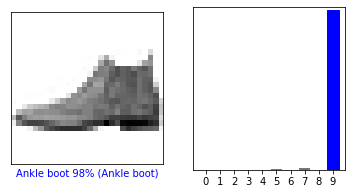

In [24]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

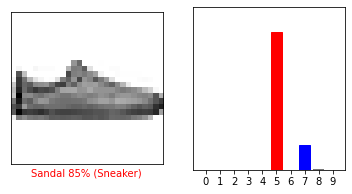

In [25]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Let's plot several images with their predictions. Note that the model can be wrong even when very confident.

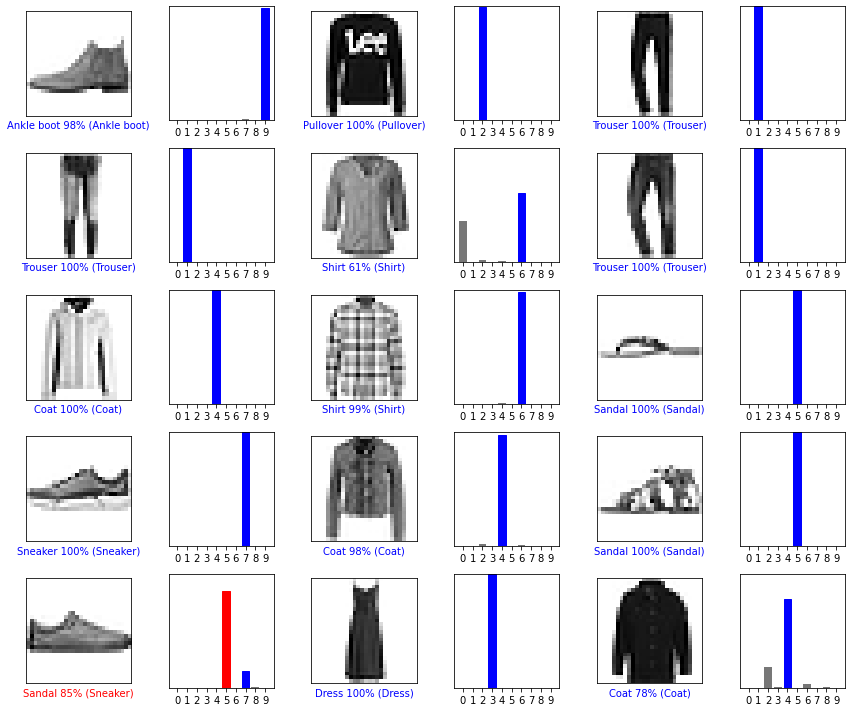

In [26]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Use the trained model

Finally, use the trained model to make a prediction about a single image.

In [27]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


`tf.keras` models are optimized to make predictions on a *batch*, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list:

In [28]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Now predict the correct label for this image:

In [29]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[1.7201362e-05 1.0329678e-12 9.9662399e-01 3.8699776e-11 3.1955366e-03
  4.9618570e-11 1.6319669e-04 8.2297106e-17 7.4005385e-11 3.5049542e-14]]


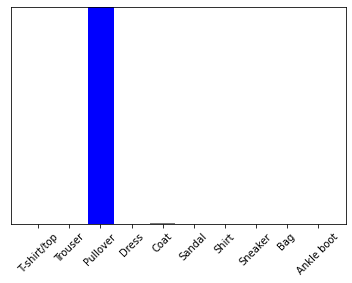

In [30]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

`keras.Model.predict` returns a list of lists—one list for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [31]:
np.argmax(predictions_single[0])

2

And the model predicts a label as expected.